In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc, MarginErrFunc

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [10]:

import pandas as pd
df = pd.read_csv('CAS_LAB_GAINESIS_TOOL_TF_18000_TI_5000.csv', index_col=0)  

df = df.sample(frac = 1, random_state = 1)

X = df.drop("Label", axis=1).to_numpy()
y = df["Label"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [11]:
df

,NetSwitchingPower,Numberofnets,Numberofports,Numberofcells,Numberofsequentialcells,CombinationalSwitchingPower,CombinationalTotalPower,TotalDynamicPower,TotalSwitchingPower,TotalTotalPower,Label
Numberofreferences,,,,,,,,,,,
-0.012935,-0.011842,-0.018262,-0.011810,0.074653,0.016319,0.014919,-0.017947,-0.015069,-0.021081,-0.018571,1
-0.002635,0.016708,0.011985,0.155636,-0.023280,-0.036724,-0.017784,0.007041,-0.012456,-0.016852,-0.004602,1
-0.017654,-0.021472,-0.024580,-0.029619,-0.125818,-0.051834,-0.052931,-0.021616,-0.016138,-0.021077,-0.019474,1
-0.102309,-0.055119,-0.024416,-0.021254,-0.023167,-0.034045,-0.023081,-0.016082,-0.059143,-0.021748,-0.015410,0
-0.013094,-0.005620,-0.004108,0.061660,0.122506,0.331186,0.333462,-0.006775,-0.009872,-0.009292,-0.013863,1
...,...,...,...,...,...,...,...,...,...,...,...
-0.018890,-0.022472,-0.029039,-0.035675,-0.119800,-0.061236,-0.067885,-0.021107,-0.015103,-0.019125,-0.020600,1
0.017458,-0.007196,-0.009771,0.015993,0.161025,0.086719,0.079579,-0.017090,-0.013747,-0.008569,-0.010135,1
0.001322,0.192565,0.210834,1.257720,0.149060,-0.078767,-0.055546,0.070015,0.046364,0.072937,0.023984,1


In [12]:
df.to_csv('CAS_LAB_GAINESIS_TOOL_TF_18000_TI_5000_shuffleed.csv')

In [13]:
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [14]:
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(DecisionTreeClassifier()),
                                 MarginErrFunc()))
icp.fit(X_train, y_train)

icp.calibrate(X_cal, y_cal)

In [24]:
prediction = icp.predict(X_test, significance=0.1)

predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1].round(3)
credibility = predictions[:, 2].round(3)

y_pred = predictions[:, 0].astype(int)

header = np.array(['c0-label', 'c1-label','c0-value', 'c1-value', 'conf', 'cred', 'y-test','y-pred'])

label_map = {0: 'TI', 1: 'TF'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(prediction)
y_label_names = label_mapper(y_pred)

table = np.vstack([prediction_categorical.T, prediction.T, confidence, credibility, y_label_names, y_pred]).T

df = pd.DataFrame(np.vstack([header, table]))
print(df)


             0         1         2         3      4      5       6       7
0     c0-label  c1-label  c0-value  c1-value   conf   cred  y-test  y-pred
1           TI        TF     False      True  0.991  0.267      TF       1
2           TI        TF     False      True  0.996  0.879      TF       1
3           TI        TF     False      True  0.996  0.636      TF       1
4           TI        TF     False      True  0.997  0.715      TF       1
...        ...       ...       ...       ...    ...    ...     ...     ...
4596        TI        TF     False      True    1.0  0.801      TF       1
4597        TI        TF     False      True  0.991  0.594      TF       1
4598        TF        TI      True     False  0.995  0.478      TI       0
4599        TI        TF     False      True  0.989  0.644      TF       1
4600        TI        TF     False      True  0.992  0.325      TF       1

[4601 rows x 8 columns]


In [25]:
prediction

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [26]:
print(df.to_string(index=False, header=False))

c0-label c1-label c0-value c1-value  conf  cred y-test y-pred
      TI       TF    False     True 0.991 0.267     TF      1
      TI       TF    False     True 0.996 0.879     TF      1
      TI       TF    False     True 0.996 0.636     TF      1
      TI       TF    False     True 0.997 0.715     TF      1
      TI       TF    False     True 0.998 0.092     TF      1
      TI       TF    False     True 0.999 0.645     TF      1
      TI       TF    False     True 0.991 0.167     TF      1
      TI       TF    False     True 0.994 0.808     TF      1
      TF       TI     True    False 0.999 0.559     TI      0
      TI       TF    False     True 0.989 0.207     TF      1
      TF       TI     True    False 0.999 0.309     TI      0
      TI       TF    False     True 0.991 0.461     TF      1
      TF       TI     True    False  0.99 0.908     TI      0
      TI       TI    False    False 0.996 0.293     TF      1
      TF       TI     True    False 0.996 0.349     TI      0
      TI

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc, MarginErrFunc
from sklearn.datasets import load_iris
import numpy as np
from sklearn.svm import SVC
from nonconformist.cp import IcpClassifier
from nonconformist.nc import NcFactory
from tabulate import tabulate   # Import tabulate function for tabular formatting



model = SVC(probability=True)    # Create the underlying model
nc = NcFactory.create_nc(model)    # Create a default nonconformity function
icp = IcpClassifier(nc)            # Create an inductive conformal classifier

# Fit the ICP using the proper training set
icp.fit(X_train, y_train)

# Calibrate the ICP using the calibration set
icp.calibrate(X_cal, y_cal)

# Produce nonconformity scores for the test set
nc_scores = icp.predict(X_test, significance=0.05)

# Obtain a set prediction for the test set
set_prediction = icp.predict(X_test, significance=None)



label_map = {0: 'TF', 1: 'TI'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(nc_scores)
y_label_names = label_mapper(y_pred)


# Tabulate the nc_scores, set_prediction, and predicted label values side by side
table = []
for i, (nc_score, set_pred) in enumerate(zip(nc_scores, set_prediction)):
    predicted_label = y_label_names[np.argmax(set_pred)]
    table.append([i+1, nc_score, set_pred, predicted_label])

headers = ['Instance', 'nc_score', 'set_prediction', 'predicted_label']
print(tabulate(table, headers=headers))



# Count the number of each category in the predicted labels
tf_count = np.count_nonzero(prediction_categorical == 'TF')
ti_count = np.count_nonzero(prediction_categorical == 'TI')





  Instance  nc_score       set_prediction                   predicted_label
----------  -------------  -------------------------------  -----------------
         1  [False  True]  [6.82006460e-08 4.61577292e-01]  TI
         2  [False  True]  [9.32777738e-05 3.62215506e-01]  TI
         3  [False  True]  [1.06848911e-04 4.17266430e-01]  TI
         4  [False  True]  [6.29833910e-05 4.41724624e-01]  TI
         5  [False  True]  [1.72673072e-04 9.48923031e-01]  TI
         6  [False  True]  [1.67585213e-04 7.16375156e-01]  TI
         7  [False  True]  [1.75613837e-04 6.48432198e-01]  TI
         8  [False  True]  [1.86082263e-04 7.15190217e-01]  TI
         9  [ True False]  [0.19871109 0.00128732]          TI
        10  [False  True]  [4.56989998e-05 3.36766704e-01]  TI
        11  [False False]  [0.02691136 0.03857711]          TI
        12  [False  True]  [9.83753032e-05 7.32320385e-01]  TI
        13  [False False]  [0.04848054 0.02152145]          TI
        14  [False  True]  

In [28]:
tf_count = 0
ti_count = 0



# Loop over each predicted label and update the corresponding counter
for label in y_label_names:
    if label == 'TF':
        tf_count += 1
    elif label == 'TI':
        ti_count += 1


# Print the results
print(f'TF count: {tf_count}')
print(f'TI count: {ti_count}')


TF count: 991
TI count: 3609


In [29]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc

In [30]:
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [31]:
nc = ClassifierNc(ClassifierAdapter(RandomForestClassifier(n_estimators=100)))
icp = IcpClassifier(nc)

icp.fit(X_train, y_train)
icp.calibrate(X_cal, y_cal)



print(pd.DataFrame(icp.predict_conf(X_test),
				   columns=['Label', 'Confidence', 'Credibility']))

      Label  Confidence  Credibility
0       0.0    0.999792     0.567443
1       1.0    0.999597     0.050947
2       1.0    0.999895     0.892970
3       1.0    0.999895     0.817784
4       0.0    0.999997     0.712693
...     ...         ...          ...
4595    1.0    0.999799     0.563398
4596    1.0    0.999956     0.264768
4597    1.0    0.997743     0.020522
4598    0.0    0.999867     0.407008
4599    1.0    0.999783     0.680848

[4600 rows x 3 columns]


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict confidence and credibility
predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1]
credibility = predictions[:, 2]


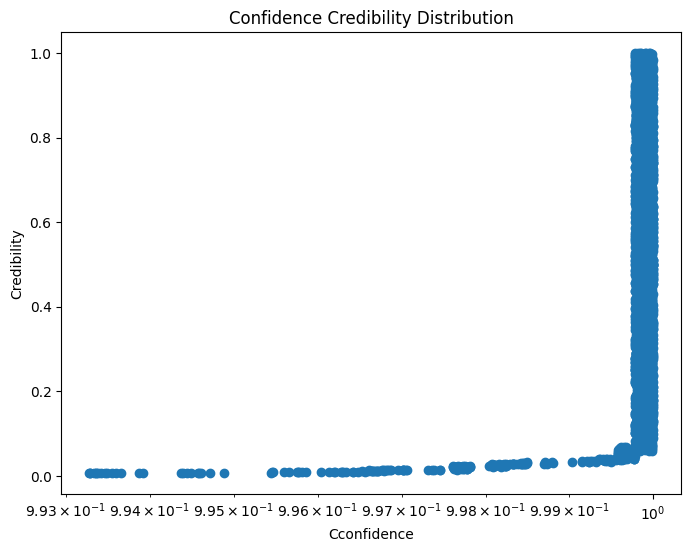

In [33]:


# Plot credibility
plt.figure(figsize=(8, 6))
plt.scatter(confidence,credibility)
plt.xscale("log")

plt.xlabel('Cconfidence')
plt.ylabel('Credibility')
plt.title('Confidence Credibility Distribution')
plt.show()